In [54]:
# -------------------------------
# 1. Import Libraries
# -------------------------------
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns


In [55]:
# -------------------------------
# 2. Load Dataset
# -------------------------------
df = pd.read_csv("spotify-2023.csv", encoding='latin1')  # Use 'latin1' to avoid Unicode errors
df.head()



,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [56]:
# 3. Select Numeric Features
features = [
    'danceability_%', 'valence_%', 'energy_%', 
    'acousticness_%', 'instrumentalness_%', 'liveness_%', 
    'speechiness_%', 'bpm', 'in_spotify_playlists', 'in_spotify_charts'
]

# Convert to numeric and fill missing values
for col in features:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)


In [57]:
# -------------------------------
# 4. Normalize Features
# -------------------------------
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])


In [58]:
# Sort the dataset by streams to get the biggest hits
top_hits = df.sort_values(by='streams', ascending=False).head(5)  # change 5 to 10 if you want more
query_songs = top_hits['track_name'].tolist()

print("Top 5 streamed songs in 2023:")
for song in query_songs:
    print(f"- {song}")

results = {}

Top 5 streamed songs in 2023:
- Love Grows (Where My Rosemary Goes)
- Anti-Hero
- Arcade
- Glimpse of Us
- Seek & Destroy


In [59]:
for query in query_songs:
    query_row = df_scaled[df_scaled['track_name'] == query].iloc[0:1]
    if query_row.empty:
        print(f"Query song {query} not found.")
        continue
    
    candidates = df_scaled[df_scaled['streams'] < query_row['streams'].values[0]].copy()
    candidates = candidates.reset_index(drop=True)
    
    query_vector = query_row[features].to_numpy()
    candidate_matrix = candidates[features].to_numpy()
    sim_scores = cosine_similarity(query_vector, candidate_matrix).flatten()
    
    candidates['similarity_score'] = sim_scores
    
    
    top_similar = candidates.sort_values(by='similarity_score', ascending=False).head(10)
    results[query] = top_similar[['track_name', 'artist(s)_name', 'similarity_score', 'streams']]

In [60]:
for query, top_songs in results.items():
    print(f"\nTop 10 hidden hits similar to '{query}':\n")
    display(top_songs)


Top 10 hidden hits similar to 'Love Grows (Where My Rosemary Goes)':



,track_name,artist(s)_name,similarity_score,streams
334,One Thing At A Time,Morgan Wallen,0.992416,148469433
390,Boy With Luv (feat. Halsey),"Halsey, BTS",0.991825,1065580332
553,Tacones Rojos,Sebastian Yatra,0.991029,510876816
797,SUPERMODEL,Mï¿½ï¿½ne,0.990298,231657891
862,BREAK MY SOUL,Beyoncï¿,0.989038,354614964
339,Everything I Love,Morgan Wallen,0.987603,95623148
404,Sugar Rush Ride,TOMORROW X TOGETHER,0.987265,107642809
465,Merry Christmas Everyone,Shakin' Stevens,0.986720,351636786
501,Sacrifice,The Weeknd,0.986541,326792833
881,Bad Decisions (with BTS & Snoop Dogg),"Snoop Dogg, BTS, Benny Blanco",0.986179,219196651



Top 10 hidden hits similar to 'Anti-Hero':



,track_name,artist(s)_name,similarity_score,streams
36,Blank Space,Taylor Swift,0.992597,1355959075
1,LALA,Myke Towers,0.978628,133716286
108,Set Fire to the Rain,Adele,0.978331,1163620694
26,Calm Down (with Selena Gomez),"Rï¿½ï¿½ma, Selena G",0.976176,899183384
224,Bite Me,ENHYPEN,0.975399,76767396
251,The Color Violet,Tory Lanez,0.973525,415932686
29,Dance The Night (From Barbie The Album),Dua Lipa,0.973214,127408954
37,Style,Taylor Swift,0.972914,786181836
107,Bones,Imagine Dragons,0.972296,838079900
45,I Ain't Worried,OneRepublic,0.971873,1085685420



Top 10 hidden hits similar to 'Arcade':



,track_name,artist(s)_name,similarity_score,streams
530,Happier Than Ever,Billie Eilish,0.973733,1056760045
819,San Lucas,Kevin Kaarl,0.972982,244891912
543,It'll Be Okay,Shawn Mendes,0.971330,287201015
349,Nobody Gets Me,SZA,0.964635,284908316
826,Matilda,Harry Styles,0.956396,366214458
444,It's Beginning To Look A Lot Like Christmas,Michael Bublï¿,0.955275,807561936
463,Special,SZA,0.955050,88092256
576,Dos Oruguitas,Sebastian Yatra,0.954742,167076418
585,Miserable Man,David Kushner,0.953153,124407432
908,Sparks,Coldplay,0.951191,624101957



Top 10 hidden hits similar to 'Glimpse of Us':



,track_name,artist(s)_name,similarity_score,streams
797,Crown,Kendrick Lamar,0.986531,42485571
683,Christmas Tree,V,0.983902,317622165
593,favorite crime,Olivia Rodrigo,0.980793,783706581
397,TV,Billie Eilish,0.980717,338564981
945,Bigger Than The Whole Sky,Taylor Swift,0.980414,121871870
585,happier,Olivia Rodrigo,0.979307,850608354
936,Sweet Nothing,Taylor Swift,0.975943,186104310
458,The Christmas Song (Merry Christmas To You) - ...,Nat King Cole,0.973426,389771964
385,Lift Me Up - From Black Panther: Wakanda Forev...,Rihanna,0.972714,297328960
531,traitor,"Juan Cruz Toledo, Huilen Toledo",0.969196,1230855859



Top 10 hidden hits similar to 'Seek & Destroy':



,track_name,artist(s)_name,similarity_score,streams
328,Low,SZA,0.979959,272377463
335,Thinkinï¿½ï¿½ï¿½ B,Morgan Wallen,0.973338,125917280
134,Calling (Spider-Man: Across the Spider-Verse) ...,"Swae Lee, A Boogie Wit da Hoodie, Metro Boomin...",0.970739,109276132
377,Devil Donï¿½ï¿½ï¿½,Morgan Wallen,0.968180,32526947
546,Love Nwantiti - Remix,"Ckay, AX'EL, Dj Yo!",0.967738,540539717
825,For Youth,BTS,0.967653,114546317
415,Die For You,Joji,0.966044,246390068
735,psychofreak (feat. WILLOW),"Camila Cabello, Willow",0.964475,75476209
886,"Come Back Home - From ""Purple Hearts""",Sofia Carson,0.964391,97610446
651,Brividi,"Mahmood, Blanco",0.961972,135079152


C:\Users\Sreeja\AppData\Local\Temp\ipykernel_30376\212780568.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


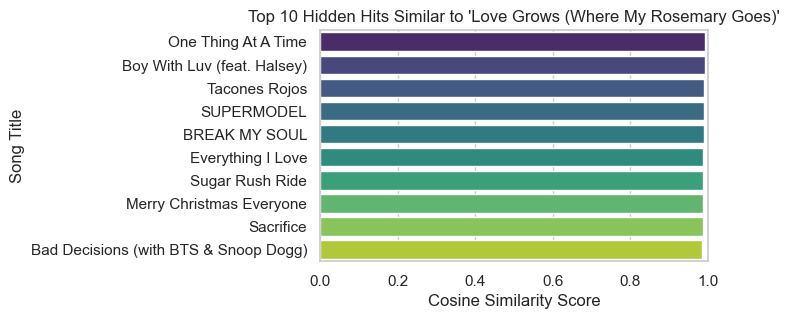

C:\Users\Sreeja\AppData\Local\Temp\ipykernel_30376\212780568.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


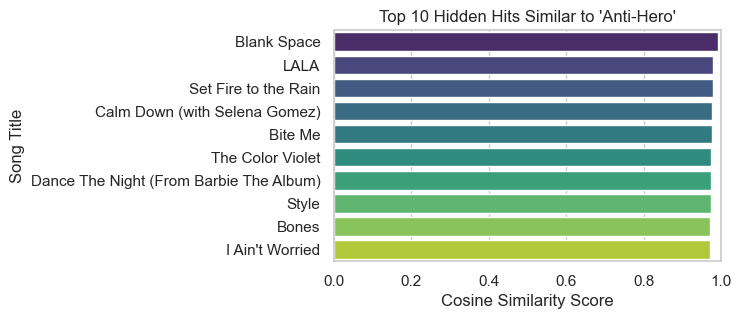

C:\Users\Sreeja\AppData\Local\Temp\ipykernel_30376\212780568.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


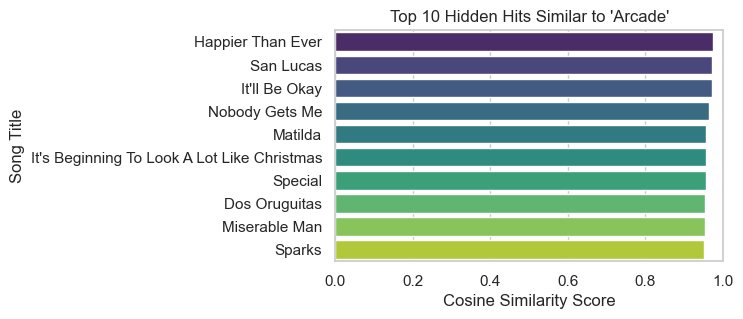

C:\Users\Sreeja\AppData\Local\Temp\ipykernel_30376\212780568.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


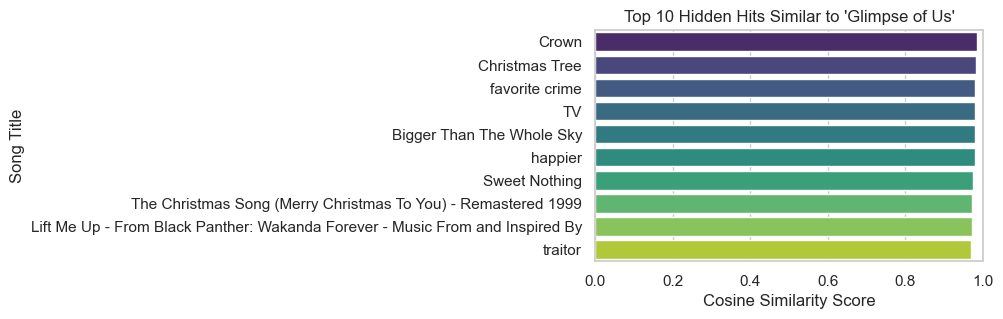

C:\Users\Sreeja\AppData\Local\Temp\ipykernel_30376\212780568.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


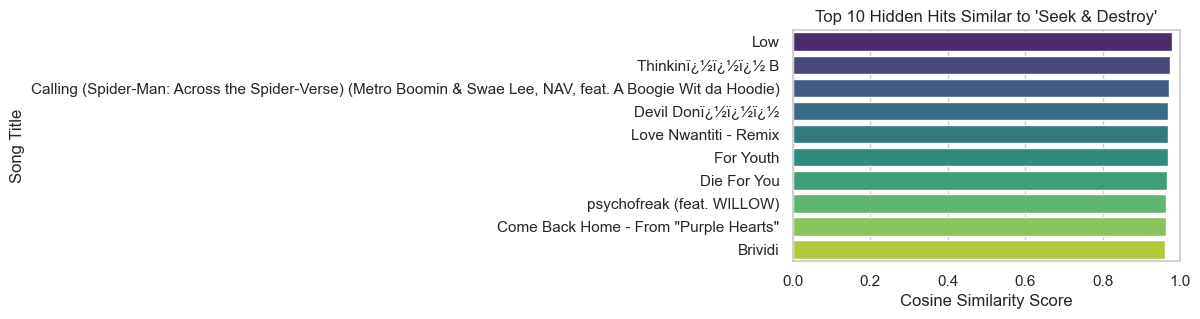

In [61]:

for query, top_songs in results.items():
    plt.figure(figsize=(5,3))
    sns.barplot(
        x='similarity_score',
        y='track_name',
        data=top_songs,
        palette='viridis'
    )
    plt.title(f"Top 10 Hidden Hits Similar to '{query}'")
    plt.xlabel("Cosine Similarity Score")
    plt.ylabel("Song Title")
    plt.xlim(0,1)
    plt.show()